In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [14]:
# prompt: view first 10 rows of features_30_sec.csv which is in path

import pandas as pd
import os

# Assuming features_30_sec.csv is in the downloaded directory
csv_file_path = os.path.join(path+"/Data/", "features_30_sec.csv")

# Check if the file exists
if os.path.exists(csv_file_path):
    try:
        df_master = pd.read_csv(csv_file_path)
        print(df_master.head(10))
    except pd.errors.ParserError:
        print(f"Error: Could not parse {csv_file_path}. Check if it's a valid CSV file.")
else:
    print(f"Error: File not found at {csv_file_path}")


          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   
5  blues.00005.wav  661794          0.302456         0.087532  0.103494   
6  blues.00006.wav  661794          0.291328         0.093981  0.141874   
7  blues.00007.wav  661794          0.307955         0.092903  0.131822   
8  blues.00008.wav  661794          0.408879         0.086512  0.142416   
9  blues.00009.wav  661794          0.273950         0.092316  0.081314   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850           1.297741e+05   
1  0.002373             1530.176679           3.75

# Genres in the dataset

In [15]:
# prompt: print the genres in the dataset df_master

print(df_master['label'].unique())

#Splitting data into X and Y

y = df_master['label']
X = df_master.drop('label', axis = 1)
X = X.drop('filename', axis = 1)

print(X.shape)
print(y.shape)

'''
1. splitted the data into X and Y features and labels
2. There are totally 10 genres in the dataset
3. Number of features are 58 with 1000 records
'''



['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
(1000, 58)
(1000,)


'\n1. splitted the data into X and Y features and labels\n2. There are totally 10 genres in the dataset\n3. Number of features are 58 with 1000 records\n'

# Understanding the features and selecting the appropriate ones (FEATURE SELECTION)

In [16]:
# prompt: print all the features of X

for col in X.columns:
  print (col)

print (X[:1])

length
chroma_stft_mean
chroma_stft_var
rms_mean
rms_var
spectral_centroid_mean
spectral_centroid_var
spectral_bandwidth_mean
spectral_bandwidth_var
rolloff_mean
rolloff_var
zero_crossing_rate_mean
zero_crossing_rate_var
harmony_mean
harmony_var
perceptr_mean
perceptr_var
tempo
mfcc1_mean
mfcc1_var
mfcc2_mean
mfcc2_var
mfcc3_mean
mfcc3_var
mfcc4_mean
mfcc4_var
mfcc5_mean
mfcc5_var
mfcc6_mean
mfcc6_var
mfcc7_mean
mfcc7_var
mfcc8_mean
mfcc8_var
mfcc9_mean
mfcc9_var
mfcc10_mean
mfcc10_var
mfcc11_mean
mfcc11_var
mfcc12_mean
mfcc12_var
mfcc13_mean
mfcc13_var
mfcc14_mean
mfcc14_var
mfcc15_mean
mfcc15_var
mfcc16_mean
mfcc16_var
mfcc17_mean
mfcc17_var
mfcc18_mean
mfcc18_var
mfcc19_mean
mfcc19_var
mfcc20_mean
mfcc20_var
   length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  661794          0.350088         0.088757  0.130228  0.002827   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0              1784.16585          129774.064525               20

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print ('Explained variance: ', pca.explained_variance_ratio_)

print (X_pca.shape)

import pickle

# Save the trained StandardScaler and PCA model
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

Explained variance:  [0.23568344 0.1665449  0.10565515 0.07470894 0.04501412 0.0337771
 0.02943903 0.02561621 0.02373193 0.01963377 0.01772879 0.01601975
 0.01578185 0.0129119  0.01244251 0.01108929 0.00953749 0.00854054
 0.00793915 0.00727253 0.00700721 0.00663527 0.00647599 0.0061634
 0.00576628 0.00538058 0.00514698 0.00506038 0.00491999 0.00473626
 0.00451965 0.0042549  0.00407057 0.00386416]
(1000, 34)


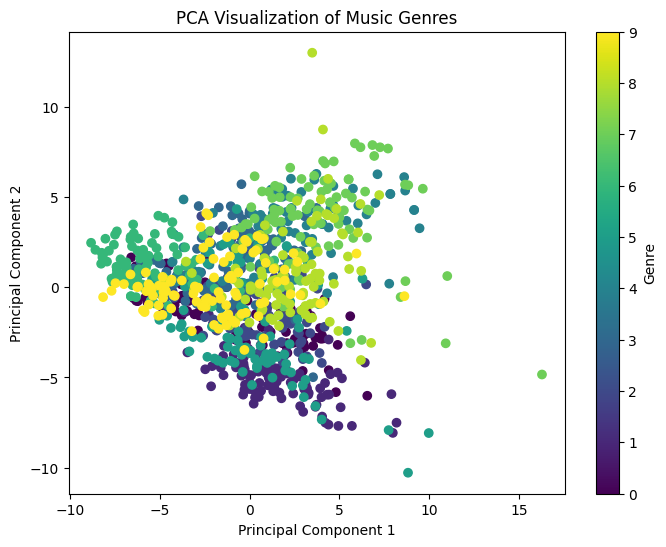

In [18]:
# prompt: visualize pca

import matplotlib.pyplot as plt

# Assuming X_pca and y are defined from the previous code

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype('category').cat.codes)  # Encode labels for color mapping
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Music Genres")
plt.colorbar(label='Genre') # Add colorbar for genre labels

plt.show()


# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(800, 34)
(200, 34)
(800,)
(200,)


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder

#Convert X_train and X_test into tensors to be fed to neural network
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

#The categorical features y_train and y_test have string data so we use Label encoder to convert them to numerical since pytorch requires
#only numerical not strings

#Label Encoder
le = LabelEncoder()

#Fit on training labels and transform them into integers
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Save the LabelEncoder to a file
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

#Convert the numpy array to pytorch tensor
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

#Define Neural network
class MusicClassifier(nn.Module):
  def __init__(self, input_size, num_classes):
    super(MusicClassifier, self).__init__()

    # input_layer -> hidden_layer_1
    self.fc1 = nn.Linear(input_size, 256)
    self.relu1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.3)  # Added dropout

    #Hidden_layer_1 -> Hidden_Layer_2
    self.fc2 = nn.Linear(256, 128)
    self.relu2 = nn.ReLU()
    self.dropout2 = nn.Dropout(0.3)  # Added dropout

    #Hidden_Layer_2 -> Hidden_Layer_3
    self.fc3 = nn.Linear(128, 64)
    self.relu3 = nn.ReLU()
    self.dropout3 = nn.Dropout(0.3)  # Added dropout

    #Hidden_Layer_3 -> Output_Layer
    self.fc4 = nn.Linear(64, num_classes)

  #def forward propagation
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu1(out)
    out = self.dropout1(out)

    out = self.fc2(out)
    out = self.relu2(out)
    out = self.dropout2(out)

    out = self.fc3(out)
    out = self.relu3(out)
    out = self.dropout3(out)  # Apply dropout

    out = self.fc4(out)
    return out

#Number of input features
input_size = X_train.shape[1] #Gets the number of features column

#Number of unique labels
num_classes = len(le.classes_) #Gets the number of unique categories

#Initialize model
model = MusicClassifier(input_size, num_classes)

#Define a loss function
criterion = nn.CrossEntropyLoss()

#Adam Optimizer an adaptive learning algorithm that adjusts learning rates automatically
optimizer = optim.Adam(model.parameters(), lr = 0.001)

#Training loops
n_epochs = 150
for epoch in range(n_epochs):
  #Forward pass
  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)

  #Backward and optimize
  optimizer.zero_grad() #setting all the previous biases and weights to zero
  loss.backward() #backpropagation
  optimizer.step() #updates the weights

  if (epoch+1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

# Evaluate Train and Test accuracies
with torch.no_grad(): #disabling gradient tracking (faster & saves memory)
  #initialize counters
  correct_train = 0
  total_train = 0

  #Get model prediction on training dataset
  outputs_train = model(X_train_tensor)

  #Convert the logits to class prediction
  _, predicted_train = torch.max(outputs_train.data, 1) #Get class with highest score

  #Count total samples
  total_train += y_train_tensor.size(0)#total training samples

  #Count correct prediction
  correct_train += (predicted_train == y_train_tensor).sum().item()

  #Compute accuracy
  train_accuracy = 100 * correct_train / total_train
  print (f'Train Accuracy: {train_accuracy: .2f}%')

  #Test Accuracy
  #initialize counters
  correct_test = 0
  total_test = 0

  #Get model prediction on test dataset
  outputs_test = model(X_test_tensor)

  #Convert the logits to class prediction
  _, predicted_test = torch.max(outputs_test.data, 1)#Get class with highest score

  #Count total test samples
  total_test += y_test_tensor.size(0)#total test samples

  #Count correct test predictions
  correct_test += (predicted_test == y_test_tensor).sum().item()

  #Compute test accuracy
  test_accuracy = 100 * correct_test / total_test
  print (f'Test Accuracy: {test_accuracy: .2f}%')


Epoch [10/150], Loss: 2.0572
Epoch [20/150], Loss: 1.6793
Epoch [30/150], Loss: 1.3864
Epoch [40/150], Loss: 1.1641
Epoch [50/150], Loss: 0.9835
Epoch [60/150], Loss: 0.8958
Epoch [70/150], Loss: 0.7657
Epoch [80/150], Loss: 0.6838
Epoch [90/150], Loss: 0.6400
Epoch [100/150], Loss: 0.5769
Epoch [110/150], Loss: 0.5204
Epoch [120/150], Loss: 0.4701
Epoch [130/150], Loss: 0.4014
Epoch [140/150], Loss: 0.3827
Epoch [150/150], Loss: 0.3875
Train Accuracy:  88.00%
Test Accuracy:  70.50%


In [21]:
import pickle

model_path = "music_classifier.pkl"

with open(model_path, 'wb') as file:
  #Pickle is not designed to save PyTorch models directly.
  #Instead of saving the entire model, you should only save the model’s state_dict(), which contains the weights.
  pickle.dump(model.state_dict(), file)

print (f"Model saved to {model_path}")

Model saved to music_classifier.pkl


In [22]:
#Load the model for inference

model = MusicClassifier(input_size, num_classes)
with open("music_classifier.pkl", "rb") as f:
  model.load_state_dict(pickle.load(f))

#Set model to evaluation mode
model.eval()
print ("Model Loaded Successfully!")

Model Loaded Successfully!


In [27]:
#Using the Loaded model for predictions
with torch.no_grad():
  sample_input = X_test_tensor[:15] #Take first 5 samples for prediction
  outputs = model(sample_input)
  _, predicted = torch.max(outputs,1)

#Convert the Numerical predictions back to string labels
predicted_labels = le.inverse_transform(predicted.numpy())

print(f"Predicted labels: {predicted_labels}")
print(f"Actual labels: {y_test[:15].values}")

Predicted labels: ['disco' 'pop' 'pop' 'metal' 'hiphop' 'metal' 'metal' 'jazz' 'reggae'
 'classical' 'hiphop' 'blues' 'metal' 'rock' 'pop']
Actual labels: ['jazz' 'pop' 'pop' 'metal' 'hiphop' 'metal' 'metal' 'jazz' 'reggae'
 'classical' 'reggae' 'blues' 'metal' 'rock' 'rock']


In [26]:
import librosa
import numpy as np
import pickle
import os
import random

# Load the trained scaler, PCA, and model
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("pca.pkl", "rb") as f:
    pca = pickle.load(f)

# Load the entire trained model (since it's pickled, not a state_dict)
with open("music_classifier.pkl", "rb") as f:
    state_dict = pickle.load(f)
model = MusicClassifier(input_size, num_classes)
# Load the state dictionary into the model
model.load_state_dict(state_dict)
model.eval()  # Set to evaluation mode


# Function to extract features from an audio file
def extract_audio_features(audio_path, min_duration=10, max_duration=15):
    duration = random.uniform(min_duration, max_duration)
    y, sr = librosa.load(audio_path, sr=None, duration= duration )

    # Compute required features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    harmony, perceptr = librosa.effects.hpss(y)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Extract means and variances
    features = {
        "length": len(y),
        "chroma_stft_mean": np.mean(chroma_stft),
        "chroma_stft_var": np.var(chroma_stft),
        "rms_mean": np.mean(rms),
        "rms_var": np.var(rms),
        "spectral_centroid_mean": np.mean(spectral_centroid),
        "spectral_centroid_var": np.var(spectral_centroid),
        "spectral_bandwidth_mean": np.mean(spectral_bandwidth),
        "spectral_bandwidth_var": np.var(spectral_bandwidth),
        "rolloff_mean": np.mean(rolloff),
        "rolloff_var": np.var(rolloff),
        "zero_crossing_rate_mean": np.mean(zero_crossing_rate),
        "zero_crossing_rate_var": np.var(zero_crossing_rate),
        "harmony_mean": np.mean(harmony),
        "harmony_var": np.var(harmony),
        "perceptr_mean": np.mean(perceptr),
        "perceptr_var": np.var(perceptr),
        "tempo": tempo
    }

    # Extract MFCCs
    for i in range(20):
        features[f"mfcc{i+1}_mean"] = np.mean(mfccs[i])
        features[f"mfcc{i+1}_var"] = np.var(mfccs[i])

    # Convert to DataFrame
    df = pd.DataFrame([features])
    print (df[:1])
    return df

# Function to predict genre
def predict_genre(audio_path):
    features = extract_audio_features(audio_path)

    # Apply scaling and PCA
    features_scaled = scaler.transform(features)
    features_pca = pca.transform(features_scaled)

    # Convert to tensor for PyTorch model
    input_tensor = torch.tensor(features_pca, dtype=torch.float32)
    # Run inference
    with torch.no_grad():
        outputs = model(input_tensor)  # Get model predictions
        _, predicted = torch.max(outputs, 1)  # Get the highest probability class

    # Convert prediction to label
    predicted_label = predicted.numpy()[0]  # Convert PyTorch tensor to NumPy array
    #Convert the Numerical predictions back to string labels
    predicted_labels = le.inverse_transform(predicted.numpy())
    return predicted_labels

# Example usage:
audio_file = "/content/Aylex.mp3"  # Replace with your actual MP3 file path
if os.path.exists(audio_file):
    predicted_genre = predict_genre(audio_file)
    print(f"Predicted Genre: {predicted_genre}")
else:
    print("Error: Audio file not found.")

   length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  661497          0.446169         0.083896  0.218316  0.005942   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1238.487212          332541.829382              2256.945715   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
0           801664.808233   1999.354577  ...     -4.18513   55.459705   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean mfcc19_var  \
0    -0.018511   57.903419     0.881036   61.511276    -2.013884  53.134365   

   mfcc20_mean  mfcc20_var  
0    -0.088445   58.189308  

[1 rows x 58 columns]
Predicted Genre: ['pop']


In [28]:
print("LabelEncoder classes:", le.classes_)

LabelEncoder classes: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
